## Imports Required Libraries

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random
import torch.nn as nn
import torch.optim as optim
import matplotlib.pylab as plt

## MNIST and Softmax

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

### torchvision.datasets 의 Parameter
- root : 데이터셋을 어느 경로에 받을 것인가?
- train : Train dataset을 다운 받을 것인지? Test dataset을 다운 받을 것인지?
- transform : 일반 이미지 (H,W,C) (픽셀값 : 0 ~ 255) --> Torch에서 쓸 수 있는 이미지 (C,H,W) (픽셀값 : 0 ~ 1)
- download : 만약 없을시 다운로드를 할 것인가?

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

### torch.utils.data.DataLoader 의 Parameter
- dataset : 어떤 데이터셋을 읽어올 것인지?
- batch_size : batch_size를 몇으로 할 것인지?
- shuffle : dataset을 섞을 것인지?
- drop_last : 만약 batch_size만큼 데이터를 가져왔을 때, 남은 데이터는 어떻게 처리할 것인지?

In [5]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

### Linear Layer Model

In [6]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device)

In [7]:
# Initialization
nn.init.normal_(linear.weight)

Parameter containing:
tensor([[ 0.1816, -0.3203,  0.7464,  ..., -1.1073, -0.9288,  0.0237],
        [-0.3739, -0.1353, -1.4771,  ..., -1.0704, -0.2870, -0.8190],
        [ 0.6629, -0.8928, -0.1996,  ..., -0.3233, -0.2469, -0.0439],
        ...,
        [-0.0205,  0.7921,  1.6696,  ...,  0.9601, -1.5459,  1.4929],
        [-0.5019, -1.0087,  0.7673,  ...,  1.3801, -0.5147,  2.4057],
        [-0.8006,  0.9329,  1.3498,  ..., -0.0187,  1.4246, -0.3995]],
       device='cuda:0', requires_grad=True)

In [8]:
# define cost/loss & optimizer
criterion = nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = optim.Adam(linear.parameters(), lr=learning_rate)

### Train

In [9]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        # H(x) 결과
        hypothesis = linear(X)
        
        # cost 계산
        cost = criterion(hypothesis, Y)
        
        # 기울기 값을 이용하여 Weight값 update
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 4.848180771
Epoch: 0002 cost = 1.464641452
Epoch: 0003 cost = 0.977406442
Epoch: 0004 cost = 0.790303588
Epoch: 0005 cost = 0.686833322
Epoch: 0006 cost = 0.618483305
Epoch: 0007 cost = 0.568978727
Epoch: 0008 cost = 0.531290889
Epoch: 0009 cost = 0.501056492
Epoch: 0010 cost = 0.476258427
Epoch: 0011 cost = 0.455025405
Epoch: 0012 cost = 0.437031597
Epoch: 0013 cost = 0.421489954
Epoch: 0014 cost = 0.408599824
Epoch: 0015 cost = 0.396514952
Learning finished


### Test

In [10]:
# Test the model using test sets
# 기욹기 값 Update를 하지 않는다.
with torch.no_grad():
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test    # correct_prediction.shape = (10000,)
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.targets[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    

Accuracy: 0.8944000005722046
Label:  8
Prediction:  8


## MNIST and Multi Linear Layers

In [11]:
# nn layers
linear1 = nn.Linear(784, 256, bias=True)
linear2 = nn.Linear(256, 256, bias=True)
linear3 = nn.Linear(256, 10, bias=True)
relu = nn.ReLU()

### Normal Initialization

In [12]:
# Initialization
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[-3.1874,  0.7429, -0.6153,  ..., -1.8201,  0.1607, -0.1961],
        [ 0.3986, -0.8667, -0.5681,  ...,  0.0619, -2.2653, -0.2265],
        [-1.2663,  0.8911, -0.4557,  ...,  1.8710,  0.6392, -0.3189],
        ...,
        [ 0.6468, -0.6644, -0.6639,  ...,  1.1450, -1.2163,  0.2803],
        [-1.0293,  0.2693,  0.8209,  ..., -0.3936, -0.7411,  1.0513],
        [ 3.1485,  2.3720,  2.9838,  ...,  1.5475,  0.1471, -1.6560]],
       requires_grad=True)

### Multi Linear Layers Model

In [13]:
# model
model = nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [14]:
# define cost/loss & optimizer
criterion = nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Train

In [15]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 146.936431885
Epoch: 0002 cost = 37.423713684
Epoch: 0003 cost = 23.808923721
Epoch: 0004 cost = 16.494710922
Epoch: 0005 cost = 12.029088974
Epoch: 0006 cost = 8.948224068
Epoch: 0007 cost = 6.606325150
Epoch: 0008 cost = 4.958807468
Epoch: 0009 cost = 3.850927353
Epoch: 0010 cost = 2.800764084
Epoch: 0011 cost = 2.280943394
Epoch: 0012 cost = 1.717090249
Epoch: 0013 cost = 1.367164135
Epoch: 0014 cost = 1.061143994
Epoch: 0015 cost = 0.970264137
Learning finished


### Test

In [16]:
# Test the model using test sets
# 기욹기 값 Update를 하지 않는다.
with torch.no_grad():
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test    # correct_prediction.shape = (10000,)
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.targets[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    

Accuracy: 0.8944000005722046
Label:  5
Prediction:  3


## MNIST and Multi Linear Layers

In [17]:
# nn layers
linear1 = nn.Linear(784, 256, bias=True)
linear2 = nn.Linear(256, 256, bias=True)
linear3 = nn.Linear(256, 10, bias=True)
relu = nn.ReLU()

### Xavier initialization

In [18]:
# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

Parameter containing:
tensor([[-0.1034,  0.0803,  0.0483,  ...,  0.0789, -0.0738, -0.1179],
        [-0.0523, -0.0236,  0.1236,  ..., -0.0448,  0.0738,  0.0199],
        [ 0.0530, -0.0847, -0.0231,  ..., -0.1392,  0.0770,  0.1188],
        ...,
        [-0.0402, -0.0703, -0.0954,  ..., -0.0580, -0.0037,  0.0464],
        [ 0.0114, -0.0688, -0.0688,  ...,  0.0683, -0.0349,  0.0073],
        [-0.0173, -0.0437,  0.1413,  ...,  0.0382,  0.0154,  0.0258]],
       requires_grad=True)

### Multi Linear Layers Model

In [19]:
# model
model = nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [20]:
# define cost/loss & optimizer
criterion = nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Train

In [21]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.245722070
Epoch: 0002 cost = 0.091757596
Epoch: 0003 cost = 0.058979426
Epoch: 0004 cost = 0.042520780
Epoch: 0005 cost = 0.032603491
Epoch: 0006 cost = 0.024328556
Epoch: 0007 cost = 0.020250238
Epoch: 0008 cost = 0.019761303
Epoch: 0009 cost = 0.016615102
Epoch: 0010 cost = 0.013518238
Epoch: 0011 cost = 0.013306746
Epoch: 0012 cost = 0.010901118
Epoch: 0013 cost = 0.011769165
Epoch: 0014 cost = 0.010773571
Epoch: 0015 cost = 0.009021522
Learning finished


### Test

In [22]:
# Test the model using test sets
# 기욹기 값 Update를 하지 않는다.
with torch.no_grad():
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test    # correct_prediction.shape = (10000,)
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.targets[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    

Accuracy: 0.8944000005722046
Label:  7
Prediction:  7


## MNIST and Deeper Linear Layers

In [23]:
# nn layers
linear1 = nn.Linear(784, 512, bias=True)
linear2 = nn.Linear(512, 512, bias=True)
linear3 = nn.Linear(512, 512, bias=True)
linear4 = nn.Linear(512, 512, bias=True)
linear5 = nn.Linear(512, 10, bias=True)
relu = nn.ReLU()

### Xavier initialization

In [24]:
# xavier initialization
nn.init.xavier_uniform_(linear1.weight)
nn.init.xavier_uniform_(linear2.weight)
nn.init.xavier_uniform_(linear3.weight)
nn.init.xavier_uniform_(linear4.weight)
nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[-0.0270, -0.0732,  0.0994,  ...,  0.0691,  0.0720, -0.0588],
        [ 0.0511, -0.0340,  0.1058,  ..., -0.0199,  0.0015,  0.0693],
        [-0.0655, -0.1059,  0.0663,  ..., -0.0791, -0.0268,  0.0369],
        ...,
        [-0.0689,  0.0269, -0.0443,  ..., -0.0963, -0.0976,  0.0587],
        [-0.0642, -0.0157,  0.0269,  ...,  0.0661, -0.0381, -0.0875],
        [ 0.0613,  0.0643,  0.0680,  ..., -0.0427, -0.0567, -0.0683]],
       requires_grad=True)

### Deeper Linear Layers Model

In [25]:
# model
model = nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [26]:
# define cost/loss & optimizer
criterion = nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Train

In [27]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.281797230
Epoch: 0002 cost = 0.088215232
Epoch: 0003 cost = 0.058629107
Epoch: 0004 cost = 0.042214498
Epoch: 0005 cost = 0.032050919
Epoch: 0006 cost = 0.025684005
Epoch: 0007 cost = 0.021287441
Epoch: 0008 cost = 0.018045099
Epoch: 0009 cost = 0.016156605
Epoch: 0010 cost = 0.015758354
Epoch: 0011 cost = 0.014057511
Epoch: 0012 cost = 0.013419772
Epoch: 0013 cost = 0.010084672
Epoch: 0014 cost = 0.010360982
Epoch: 0015 cost = 0.012813476
Learning finished


### Test

In [28]:
# Test the model using test sets
# 기욹기 값 Update를 하지 않는다.
with torch.no_grad():
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test    # correct_prediction.shape = (10000,)
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.targets[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    

Accuracy: 0.8944000005722046
Label:  9
Prediction:  9


## MNIST and DropOut

In [29]:
drop_prob = 0.3

# nn layers
linear1 = nn.Linear(784, 512, bias=True)
linear2 = nn.Linear(512, 512, bias=True)
linear3 = nn.Linear(512, 512, bias=True)
linear4 = nn.Linear(512, 512, bias=True)
linear5 = nn.Linear(512, 10, bias=True)
relu = nn.ReLU()
dropout = nn.Dropout(p=drop_prob)

### Xavier initialization

In [30]:
# xavier initialization
nn.init.xavier_uniform_(linear1.weight)
nn.init.xavier_uniform_(linear2.weight)
nn.init.xavier_uniform_(linear3.weight)
nn.init.xavier_uniform_(linear4.weight)
nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[ 0.0688,  0.0985,  0.0080,  ...,  0.0980,  0.0887, -0.1003],
        [-0.0148,  0.1046, -0.0906,  ..., -0.0466, -0.0312, -0.0942],
        [ 0.0498,  0.0298, -0.0837,  ...,  0.0230, -0.0156,  0.0145],
        ...,
        [ 0.0443,  0.0730, -0.0081,  ...,  0.0012,  0.0086, -0.0369],
        [ 0.0658,  0.0114, -0.0588,  ...,  0.0412, -0.0514, -0.0435],
        [-0.0030, -0.0062,  0.0489,  ..., -0.0131, -0.0616, -0.0634]],
       requires_grad=True)

### Deeper Linear Layers Model with Dropout

In [31]:
# model
model = nn.Sequential(linear1, relu, dropout,
                      linear2, relu, dropout,
                      linear3, relu, dropout,
                      linear4, relu, dropout,
                      linear5).to(device)

In [32]:
# define cost/loss & optimizer
criterion = nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Train

In [33]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.310823053
Epoch: 0002 cost = 0.141329929
Epoch: 0003 cost = 0.113971427
Epoch: 0004 cost = 0.093698911
Epoch: 0005 cost = 0.083575368
Epoch: 0006 cost = 0.071843401
Epoch: 0007 cost = 0.066984847
Epoch: 0008 cost = 0.063782044
Epoch: 0009 cost = 0.058074739
Epoch: 0010 cost = 0.056956585
Epoch: 0011 cost = 0.048598081
Epoch: 0012 cost = 0.048462052
Epoch: 0013 cost = 0.047489330
Epoch: 0014 cost = 0.044893965
Epoch: 0015 cost = 0.046098229
Learning finished


### Test

In [34]:
# Test the model using test sets
# 기욹기 값 Update를 하지 않는다.
with torch.no_grad():
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test    # correct_prediction.shape = (10000,)
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.targets[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.8944000005722046
Label:  3
Prediction:  3


## MNIST and BatchNorm

In [35]:
# nn layers
linear1 = nn.Linear(784, 32, bias=True)
linear2 = nn.Linear(32, 32, bias=True)
linear3 = nn.Linear(32, 10, bias=True)
relu = nn.ReLU()
bn1 = nn.BatchNorm1d(32)
bn2 = nn.BatchNorm1d(32)

nn_linear1 = nn.Linear(784, 32, bias=True)
nn_linear2 = nn.Linear(32, 32, bias=True)
nn_linear3 = nn.Linear(32, 10, bias=True)

In [36]:
# parameters
learning_rate = 0.01
training_epochs = 10
batch_size = 32

### BatchNorm Model vs Non BatchNorm Model

In [37]:
# model
bn_model = nn.Sequential(linear1, bn1, relu,
                         linear2, bn2, relu,
                         linear3).to(device)
nn_model = nn.Sequential(nn_linear1, relu,
                         nn_linear2, relu,
                         nn_linear3).to(device)

In [38]:
# define cost/loss & optimizer
criterion = nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
bn_optimizer = optim.Adam(bn_model.parameters(), lr=learning_rate)
nn_optimizer = optim.Adam(nn_model.parameters(), lr=learning_rate)

### Train and Test Model

In [39]:
# dataset loader
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          drop_last=True)

In [40]:
# Save Losses and Accuracies every epoch
# We are going to plot them later
train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

train_total_batch = len(train_loader)
test_total_batch = len(test_loader)

for epoch in range(training_epochs):
    bn_model.train()  # set the model to train mode

    for X, Y in train_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        # batch_norm_model training
        bn_prediction = bn_model(X)
        bn_loss = criterion(bn_prediction, Y)
        
        bn_optimizer.zero_grad()
        bn_loss.backward()
        bn_optimizer.step()

        # Non batch_norm_model training
        nn_prediction = nn_model(X)
        nn_loss = criterion(nn_prediction, Y)
        
        nn_optimizer.zero_grad()
        nn_loss.backward()
        nn_optimizer.step()

    # Test
    with torch.no_grad():
        bn_model.eval()     # set the model to evaluation mode

        # Test the model using train sets
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
        for i, (X, Y) in enumerate(train_loader):
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / train_total_batch, nn_loss / train_total_batch, bn_acc / train_total_batch, nn_acc / train_total_batch

        # Save train losses/acc
        train_losses.append([bn_loss, nn_loss])
        train_accs.append([bn_acc, nn_acc])
        print(
            '[Epoch %d-TRAIN] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
            (epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))
        
        # Test the model using test sets
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
        for i, (X, Y) in enumerate(test_loader):
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / test_total_batch, nn_loss / test_total_batch, bn_acc / test_total_batch, nn_acc / test_total_batch

        # Save valid losses/acc
        valid_losses.append([bn_loss, nn_loss])
        valid_accs.append([bn_acc, nn_acc])
        print(
            '[Epoch %d-VALID] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
                (epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))
        print()

print('Learning finished')

[Epoch 1-TRAIN] Batchnorm Loss(Acc): bn_loss:0.13529(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.20053(nn_acc:0.94)
[Epoch 1-VALID] Batchnorm Loss(Acc): bn_loss:0.15587(bn_acc:0.95) vs No Batchnorm Loss(Acc): nn_loss:0.21638(nn_acc:0.94)

[Epoch 2-TRAIN] Batchnorm Loss(Acc): bn_loss:0.11198(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.14704(nn_acc:0.96)
[Epoch 2-VALID] Batchnorm Loss(Acc): bn_loss:0.13282(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.17566(nn_acc:0.95)

[Epoch 3-TRAIN] Batchnorm Loss(Acc): bn_loss:0.08525(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.14337(nn_acc:0.96)
[Epoch 3-VALID] Batchnorm Loss(Acc): bn_loss:0.11379(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.17978(nn_acc:0.95)

[Epoch 4-TRAIN] Batchnorm Loss(Acc): bn_loss:0.07527(bn_acc:0.98) vs No Batchnorm Loss(Acc): nn_loss:0.14455(nn_acc:0.96)
[Epoch 4-VALID] Batchnorm Loss(Acc): bn_loss:0.10615(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.18685(nn_acc:0.95)

[Epoch 5-TRAIN] Batc

In [41]:
def plot_compare(loss_list: list, ylim=None, title=None) -> None:
    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]

    plt.figure(figsize=(15, 10))
    plt.plot(bn, label='With BN')
    plt.plot(nn, label='Without BN')
    if ylim:
        plt.ylim(ylim)

    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')
    plt.show()

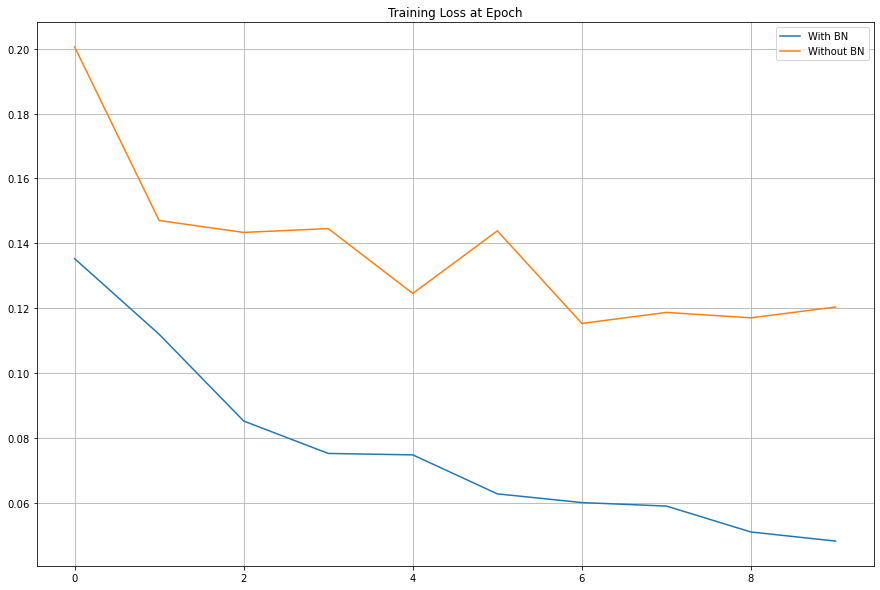

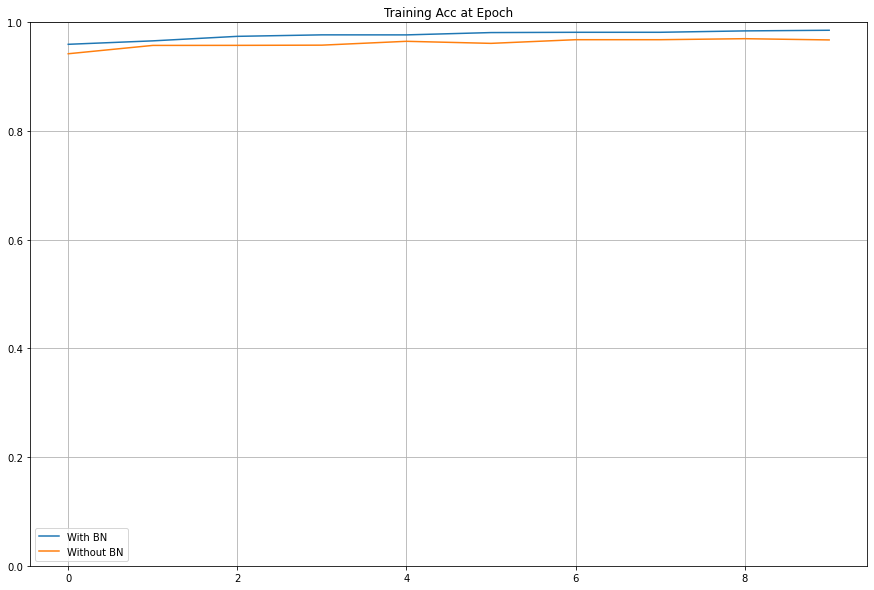

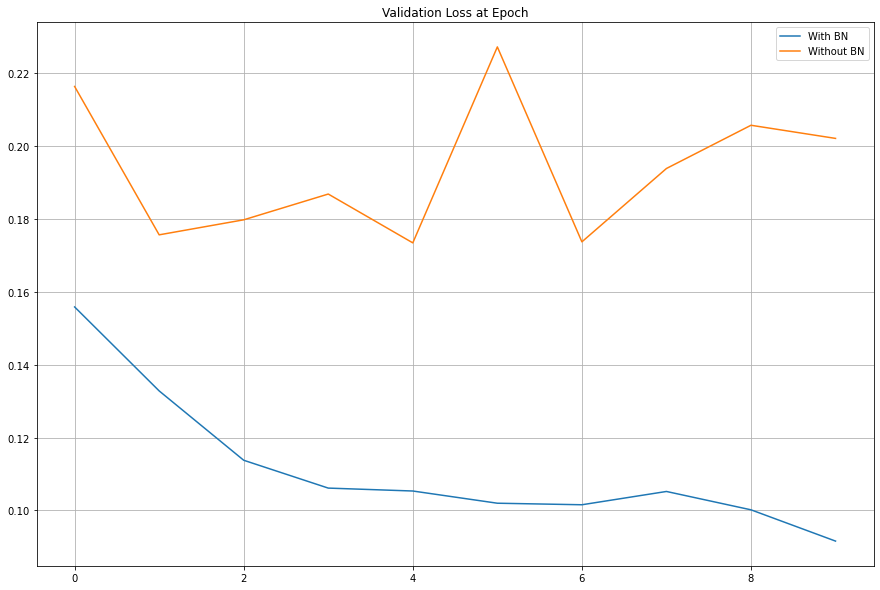

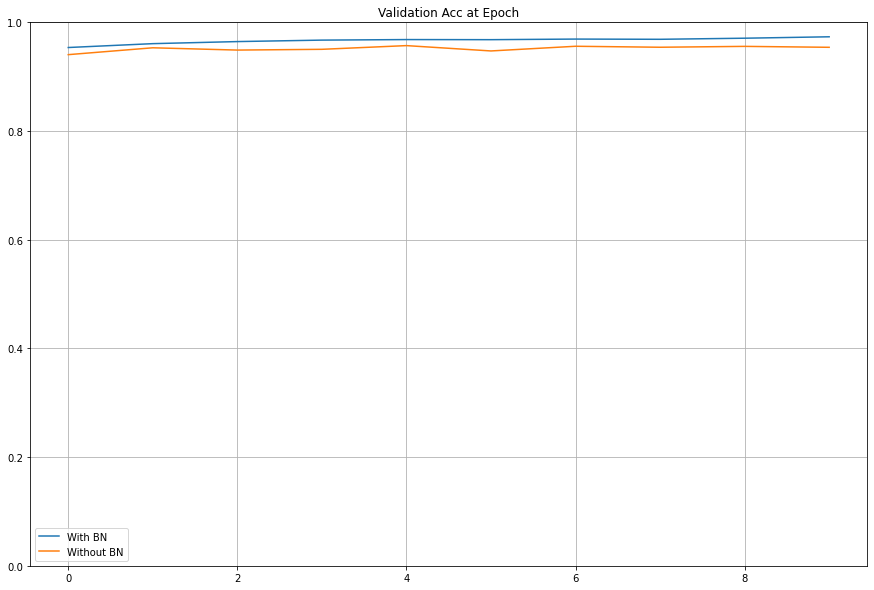

In [42]:
plot_compare(train_losses, title='Training Loss at Epoch')
plot_compare(train_accs, [0, 1.0], title='Training Acc at Epoch')
plot_compare(valid_losses, title='Validation Loss at Epoch')
plot_compare(valid_accs, [0, 1.0], title='Validation Acc at Epoch')